### Estates Price prediction

In [574]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [575]:
# import data
df = pd.read_csv('../../data/estates.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [576]:
# Prepare and Preprocessing data
# Remove "," from Area
df.loc[:, 'Area'] = df.loc[:, 'Area'].str.replace(',', '')
# Remove Rows with missing values
df = df.dropna()
# Cast Area to int
df.loc[:, 'Area'] = df['Area'].astype(int)
# Cast Parking boolean to int
df.loc[:, 'Parking'] = df['Parking'].astype(int)
# Cast Warehouse boolean to int
df.loc[:, 'Warehouse'] = df['Warehouse'].astype(int)
# Cast Elevator boolean to int
df.loc[:, 'Elevator'] = df['Elevator'].astype(int)
# Remove rows that have big Area
df = df[df['Area'] < 10000]
# get Area, Room, Parking, Warehouse, Elevator, Address, Price
cdf = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price']]
cdf

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1.850000e+09
1,60,1,1,1,1,Shahran,1.850000e+09
2,79,2,1,1,1,Pardis,5.500000e+08
3,95,2,1,1,1,Shahrake Qods,9.025000e+08
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09
...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09
3475,83,2,1,1,1,Niavaran,6.800000e+09
3476,75,2,0,0,0,Parand,3.650000e+08
3477,105,2,1,1,1,Dorous,5.600000e+09


#### Preprocessing data

In [577]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Encoding Address
labelencoder_x = LabelEncoder()
cdf.loc[:, 'Address'] = labelencoder_x.fit_transform(cdf['Address'])
# show encoded Address
cdf['Address']


/home/smbh/.virtualenvs/lab/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0       156
1       156
2       117
3       152
4       150
       ... 
3474    163
3475    105
3476    115
3477     39
3478    115
Name: Address, Length: 3452, dtype: int64

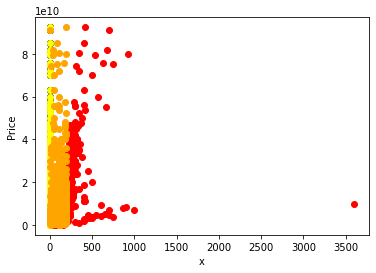

In [578]:
# plot all based on y = Price
fig = plt.figure()
ax = fig.add_subplot(111)
# Area
ax.scatter(cdf['Area'], cdf['Price'], color='red', label='Area')
# Room
ax.scatter(cdf['Room'], cdf['Price'], color='blue', label='Room')
# Parking space
ax.scatter(cdf['Parking'], cdf['Price'], color='green', label='Parking')
# Warehouse
ax.scatter(cdf['Warehouse'], cdf['Price'], color='black', label='Warehouse')
# Elevator
ax.scatter(cdf['Elevator'], cdf['Price'], color='yellow', label='Elevator')
# Address
ax.scatter(cdf['Address'], cdf['Price'], color='orange', label='Address')
# labels
ax.set_xlabel('x')
ax.set_ylabel('Price')
plt.show()

In [579]:
msk = np.random.rand(len(cdf)) < 0.8
# 80% of data for training
train = cdf[msk]
# 20% of data for testing
test = cdf[~msk]


### Train

In [580]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

x_train = train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']]
y_train = train[['Price']]

reg.fit(x_train, y_train)
# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)


Coefficients:  [[ 2.59950094e+07  4.02672150e+09  2.78962540e+08  9.70540171e+08
   8.98692635e+08 -3.39442151e+06]]
Intercept:  [-7.32549768e+09]


### Prediction

In [581]:
x_test = test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']]
y_test = test[['Price']]
y_hat = reg.predict(x_test)

# # RSE
from sklearn.metrics import mean_squared_error
rse = mean_squared_error(y_test, y_hat)
print('RSE: ', rse)

# # R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_hat)
print('R2: ', r2)

RSE:  3.970246555363817e+19
R2:  0.49436958774966877
